<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/heights-and-weights/sex_height_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sex, Height, and Weight

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.stats as stats

In [2]:
# Read the dataaset from the specified URL
df = pd.read_csv("https://tinyurl.com/sex-height-weight")
df.shape

(1000, 4)

In [3]:
# Display the the head of the dataset
df.head()

,Name,Sex,Height,Weight
0,Jennifer Winters,Female,165.0,71.2
1,William Hall,Female,161.2,67.4
2,Jennifer Gill,Male,179.5,75.6
3,Maria Flynn,Male,185.7,68.5
4,Kevin Abbott,Male,173.4,82.0


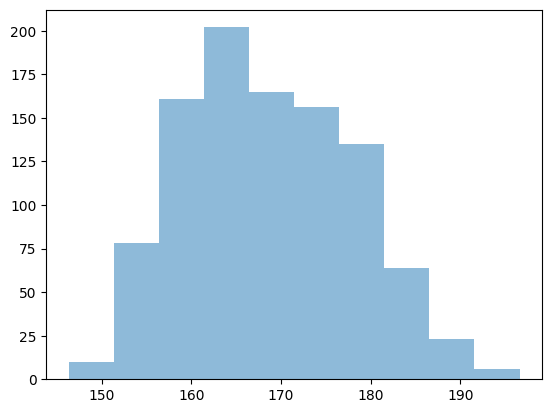

In [4]:
# Histogram for the population (males and females) heights
pyplot.hist(df['Height'], alpha=0.5)
pyplot.show()

In [5]:
# mean of the  population height (males and females, together)
np.mean(df['Height'])

168.69769999999997

In [6]:
# Group by Sex to find how many rows for each sex
df.groupby('Sex').size()

Sex
Female    496
Male      504
dtype: int64

In [7]:
# Extract the heights of the males
males_heights = df.loc[df['Sex'] == 'Male']['Height']
males_heights.head()

2    179.5
3    185.7
4    173.4
5    173.4
7    180.4
Name: Height, dtype: float64

In [8]:
# Extract the height of the females
females_heights = df.loc[df['Sex'] == 'Female']['Height']
females_heights.head()

0    165.0
1    161.2
6    171.5
8    159.2
9    165.3
Name: Height, dtype: float64

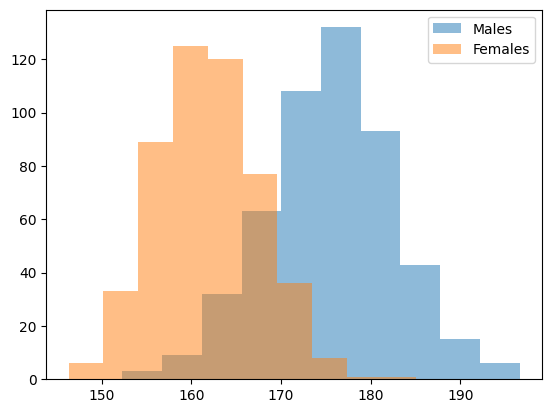

In [9]:
pyplot.hist(males_heights, alpha=0.5, label='Males') # Histogram for the males heights
pyplot.hist(females_heights, alpha=0.5, label='Females') # Histogram for the females heights
pyplot.legend(loc='upper right')
pyplot.show()

In [10]:
# the mean of the males heights
np.mean(males_heights)

175.41488095238097

In [11]:
# the mean of the females heights
np.mean(females_heights)

161.87217741935484

## Statistical Significance in the difference between the heights according to the sex

In [12]:
stats.ttest_ind(a=males_heights, b=females_heights)

Ttest_indResult(statistic=33.34828635993142, pvalue=1.9012441400770298e-164)

In [13]:
sample1 = males_heights.sample(n=10)
sample1

229    179.8
335    174.0
56     169.1
967    187.6
374    190.1
450    174.6
550    175.6
950    173.3
968    174.7
924    183.4
Name: Height, dtype: float64

In [14]:
np.mean(sample1)

178.22

In [15]:
sample2 = males_heights.sample(n=10)
sample2

152    170.2
357    173.0
459    166.6
866    177.0
779    179.3
722    165.6
937    180.0
942    179.6
237    176.3
267    165.0
Name: Height, dtype: float64

In [16]:
np.mean(sample2)

173.26

In [17]:
np.mean(sample1) - np.mean(sample2)

4.960000000000008

In [18]:
stats.ttest_ind(a=sample1, b=sample2)

Ttest_indResult(statistic=1.7274087917057077, pvalue=0.10121324543544877)

In [19]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = males_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

-0.01079399999999973

(array([  19.,  126.,  609., 1715., 2768., 2658., 1506.,  476.,  111.,
          12.]),
 array([-11.56 ,  -9.214,  -6.868,  -4.522,  -2.176,   0.17 ,   2.516,
          4.862,   7.208,   9.554,  11.9  ]),
 <BarContainer object of 10 artists>)

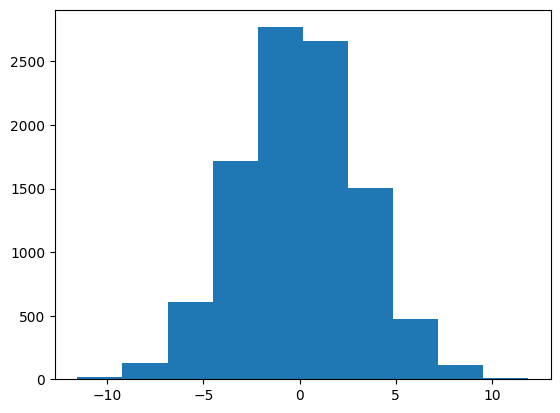

In [20]:
pyplot.hist(x=diff)

In [21]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = females_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

13.522685000000003

(array([  10.,   87.,  564., 1805., 3112., 2846., 1209.,  332.,   30.,
           5.]),
 array([ 2.1 ,  4.47,  6.84,  9.21, 11.58, 13.95, 16.32, 18.69, 21.06,
        23.43, 25.8 ]),
 <BarContainer object of 10 artists>)

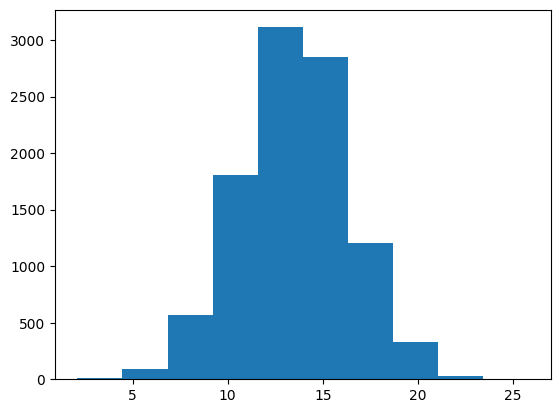

In [22]:
pyplot.hist(x=diff)